In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Test the data

In [3]:
data=pd.read_csv("test_AbJTz2l.csv")

In [4]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
data.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [6]:
data.shape

(5681, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [9]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# Data Preprocessing

In [10]:
data['Item_Identifier'].nunique()

1543

In [11]:
data["Outlet_Identifier"].nunique()

10

In [12]:
data=data.drop("Item_Identifier",axis=1)

In [13]:
data=data.drop("Outlet_Identifier",axis=1)

In [14]:
data.isna().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
num_col=data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]


In [16]:
from sklearn.impute import SimpleImputer

In [17]:
sr=SimpleImputer(missing_values=np.nan,strategy="mean")
sr=sr.fit(num_col)
num_col=sr.transform(num_col)

In [18]:
type(num_col)

numpy.ndarray

In [19]:
num_col=pd.DataFrame(num_col,columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

In [20]:
num_col.isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

In [21]:
data.isna().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [22]:
data.drop(['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'] ,axis=1,inplace=True)

In [23]:
data

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1
1,reg,Dairy,NaN,Tier 2,Supermarket Type1
2,Low Fat,Others,NaN,Tier 3,Grocery Store
3,Low Fat,Snack Foods,NaN,Tier 2,Supermarket Type1
4,Regular,Dairy,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...
5676,Regular,Snack Foods,Small,Tier 1,Supermarket Type1
5677,Regular,Starchy Foods,Medium,Tier 3,Supermarket Type2
5678,Low Fat,Health and Hygiene,NaN,Tier 2,Supermarket Type1
5679,Regular,Canned,NaN,Tier 2,Supermarket Type1


In [24]:
data=pd.concat([num_col,data],axis=1)

In [25]:
data

,"(Item_Weight,)","(Item_Visibility,)","(Item_MRP,)","(Outlet_Establishment_Year,)",Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0.007565,107.8622,1999.0,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1
1,8.300000,0.038428,87.3198,2007.0,reg,Dairy,NaN,Tier 2,Supermarket Type1
2,14.600000,0.099575,241.7538,1998.0,Low Fat,Others,NaN,Tier 3,Grocery Store
3,7.315000,0.015388,155.0340,2007.0,Low Fat,Snack Foods,NaN,Tier 2,Supermarket Type1
4,12.695633,0.118599,234.2300,1985.0,Regular,Dairy,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997.0,Regular,Snack Foods,Small,Tier 1,Supermarket Type1
5677,7.600000,0.142991,169.1448,2009.0,Regular,Starchy Foods,Medium,Tier 3,Supermarket Type2
5678,10.000000,0.073529,118.7440,2002.0,Low Fat,Health and Hygiene,NaN,Tier 2,Supermarket Type1
5679,15.300000,0.000000,214.6218,2007.0,Regular,Canned,NaN,Tier 2,Supermarket Type1


In [26]:
data.isna().sum()

(Item_Weight,)                     0
(Item_Visibility,)                 0
(Item_MRP,)                        0
(Outlet_Establishment_Year,)       0
Item_Fat_Content                   0
Item_Type                          0
Outlet_Size                     1606
Outlet_Location_Type               0
Outlet_Type                        0
dtype: int64

In [27]:
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"]).mode()[0]

In [28]:
data.isna().sum()

(Item_Weight,)                  0
(Item_Visibility,)              0
(Item_MRP,)                     0
(Outlet_Establishment_Year,)    0
Item_Fat_Content                0
Item_Type                       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [29]:
data.shape

(5681, 9)

In [30]:
data["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [31]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [32]:
data["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [33]:
data["Outlet_Years"]=2013-data[('Outlet_Establishment_Year',)]

In [34]:
data["Outlet_Years"].astype(int)

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5681, dtype: int32

# Exploratory Data Analysis

C:\Users\libin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="('Item_Weight',)", ylabel='Density'>

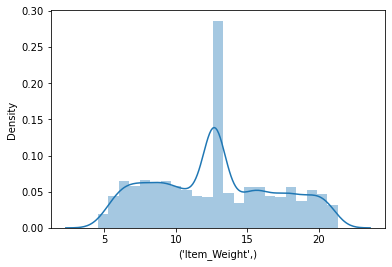

In [35]:
sns.distplot(data[('Item_Weight',)])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="('Item_MRP',)", ylabel='Density'>

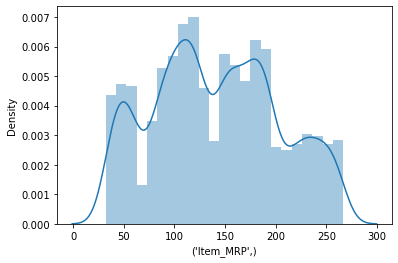

In [36]:
sns.distplot(data[('Item_MRP',)])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="('Item_Visibility',)", ylabel='Density'>

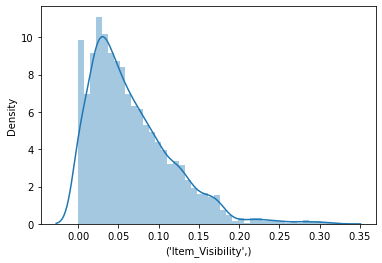

In [37]:
sns.distplot(data[('Item_Visibility',)])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

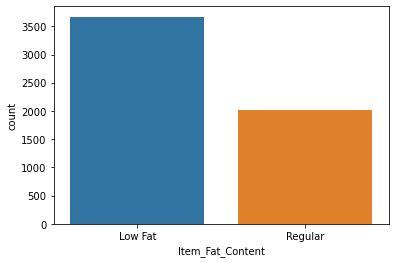

In [38]:
sns.countplot(data["Item_Fat_Content"])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

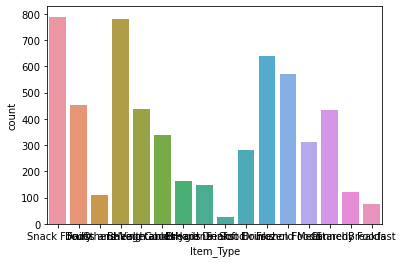

In [39]:
sns.countplot(data['Item_Type'])


C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel="('Outlet_Establishment_Year',)", ylabel='count'>

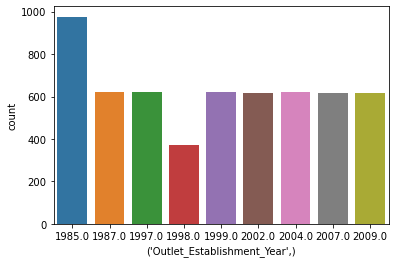

In [40]:
sns.countplot(data[('Outlet_Establishment_Year',)])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

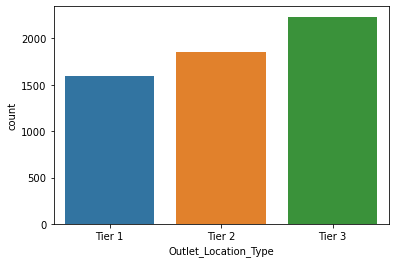

In [41]:
sns.countplot(data['Outlet_Location_Type'])

C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

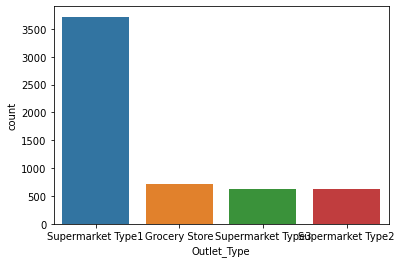

In [42]:
sns.countplot(data['Outlet_Type'])

<AxesSubplot:>

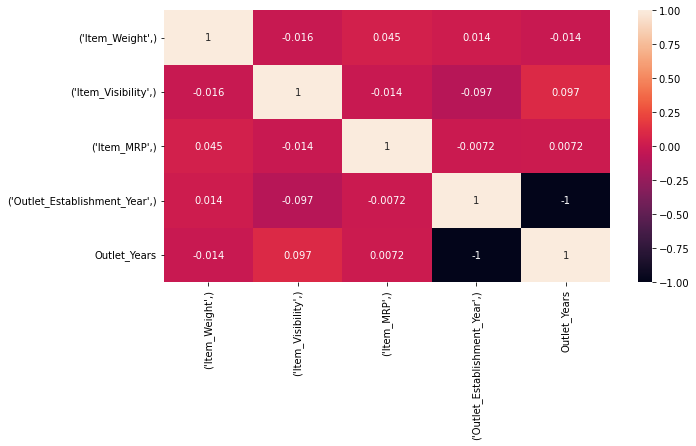

In [43]:
corr=data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#data["Outlet_Identifier"]=le.fit_transform(data["Outlet_Identifier"])
data["Outlet_Size"]=le.fit_transform(data["Outlet_Size"])
data["Outlet_Location_Type"]=le.fit_transform(data["Outlet_Location_Type"])
data["Outlet_Type"]=le.fit_transform(data["Outlet_Type"])
data["Item_Fat_Content"]=le.fit_transform(data["Item_Fat_Content"])
data["Item_Type"]=le.fit_transform(data["Item_Type"])

In [45]:
cat_col=["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
for i in cat_col:
    data[i]=le.fit_transform(data[i])

In [46]:
data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [47]:
data

,"(Item_Weight,)","(Item_Visibility,)","(Item_MRP,)","(Outlet_Establishment_Year,)",Item_Type,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,20.750000,0.007565,107.8622,1999.0,13,14.0,1,0,1,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007.0,4,6.0,0,1,1,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1998.0,11,15.0,1,0,1,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,2007.0,13,6.0,1,0,1,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,1985.0,4,28.0,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997.0,13,16.0,0,1,1,1,0,0,0,1,0,0
5677,7.600000,0.142991,169.1448,2009.0,15,4.0,0,1,1,0,0,1,0,0,1,0
5678,10.000000,0.073529,118.7440,2002.0,8,11.0,1,0,1,0,1,0,0,1,0,0
5679,15.300000,0.000000,214.6218,2007.0,3,6.0,0,1,1,0,1,0,0,1,0,0


In [48]:
data.to_csv("test_AbJTz2l.csv",index=False)